In [1]:
import pandas as pd

In [21]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
PATH = '2017/Student-Feedback-Surveys-Superview.csv'

In [4]:
df = pd.read_csv(PATH)

In [80]:
df

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",1,3,Just right
1,36,Los Angeles,Apps,1,4,A little too fast
2,117,San Francisco,Games,1,4,Way too slow
3,253,NaN,NaN,2,4,A little too fast
4,350,New York City,"Apps, Explorer",1,4,Just right
5,23,Redwood City,Apps,1,5,Just right
6,28,Los Angeles,Apps,7,5,Just right
7,65,San Francisco,Apps,1,5,A little too slow
8,101,Santa Clara,Apps,1,5,A little too slow
9,124,Santa Clara,Apps,1,5,Just right


## Rid our dataset of (3) invalid ratings

In [5]:
df = df[ df["Rating (Num)"] != '#ERROR!']
df = df[ df["Rating (Num)"] != '0']
df["Rating (Num)"] = df["Rating (Num)"].astype(int)

In [6]:
df["Rating (Num)"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10,  1,  2])

# How many more promoters are there than detractors across our 2017 data?

In [8]:
def count_promoters(df):
    return (df["Rating (Num)"] >= 9).sum()

num_of_promoters = count_promoters(df)
num_of_promoters

760

In [9]:
def count_passives(df):
    return (df["Rating (Num)"] >= 7).sum() - count_promoters(df)
num_of_passives = count_passives(df)
num_of_passives

569

In [10]:
def count_detractors(df):
    return (df["Rating (Num)"] <= 6).sum()
num_of_detractors = count_detractors(df)
num_of_detractors

119

In [11]:
total = num_of_detractors + num_of_passives + num_of_promoters
actual_total = len(df)
actual_total == total

True

In [12]:
def calculate_nps(promoters, passives, detractors):
     return (promoters - detractors) / (promoters + passives + detractors)

In [13]:
calculate_nps(num_of_promoters, num_of_passives, num_of_detractors) * 100

44.267955801104975

(array([  2.,   2.,   8.,  13.,  35.,  59., 177., 392., 384., 376.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

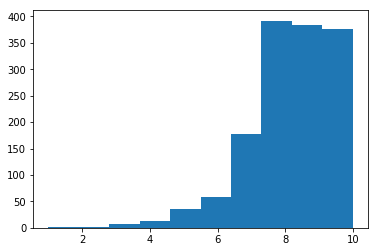

In [14]:
plt.hist(df["Rating (Num)"])

In [15]:
def week_str_to_int(week):
    return int(week[-1])

week_arr = [week_str_to_int(week) for week in df['Week']]
df['Week'] = week_arr


# Which track boasts the best promoter-to-detractor ratio?

In [16]:
tracks = df['Track'].dropna().unique()
track_promoter_detractor_ratio = {}
for track in tracks:
    temp_df = df[df['Track'] == track]
    track_promoter_detractor_ratio[track] = count_promoters(temp_df) / (count_detractors(temp_df) + count_promoters(temp_df))
track_promoter_detractor_ratio

{'Apps, Explorer': 0.7913043478260869,
 'Apps': 0.8504854368932039,
 'Games': 0.9366197183098591,
 'VR': 0.9583333333333334,
 'Games, Explorer': 1.0}

# Does the student experience get better the longer that they are enrolled at the Summer Academy?


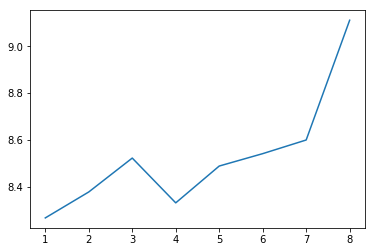

In [39]:
weeks_in_order = sorted(df['Week'].unique())
average_rating_by_week = [(df[df['Week'] == week]['Rating (Num)']).mean() for week in weeks_in_order]

plt.plot(weeks_in_order, average_rating_by_week)

# Does student satisfaction vary by location?

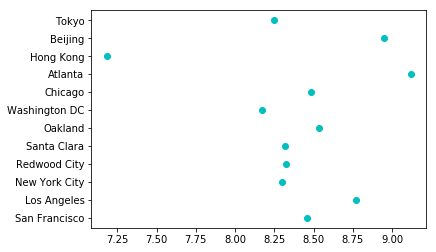

In [202]:
locations = df['Location'].dropna().unique()
average_rating_by_location = [(df[df['Location'] == location]['Rating (Num)']).mean() for location in locations]

plt.plot(average_rating_by_location, locations, 'ro', color='c')

# dic = dict(zip(locations, average_rating_by_location))
# plt.plot(list(dic))

# What are things we could find here that could “help the business”?

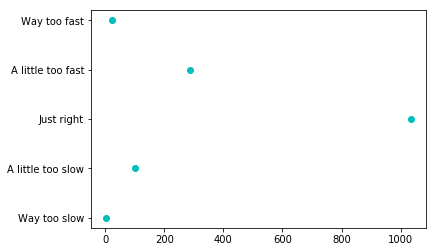

In [205]:
# pacings = sorted(df['Schedule Pacing'].dropna().unique())
pacings = ['Way too slow', 'A little too slow', 'Just right', 'A little too fast', 'Way too fast']
pacing_counts = [len(df[df['Schedule Pacing'] == pace]['Schedule Pacing']) for pace in pacings]
pacings_to_counts = list(zip(pacings, pacing_counts))
plt.plot(pacing_counts, pacings, 'ro', color='c')

In [85]:
tracks = df['Track'].dropna().unique()

array(['Apps, Explorer', 'Apps', 'Games', 'VR', 'Games, Explorer'],
      dtype=object)

In [206]:
def plot_pace_to_track(track, clr):
    pacings = ['Way too slow', 'A little too slow', 'Just right', 'A little too fast', 'Way too fast']
    total_students_in_track = (df['Track'] == track).sum()
    pacing_counts = [(df[df['Track'] == track]['Schedule Pacing'] == pace).sum() / total_students_in_track for pace in pacings]
    plt.plot(pacing_counts, pacings, 'ro', color=clr, label =track)

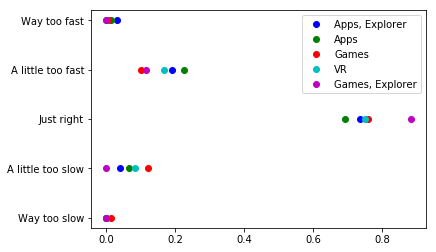

In [207]:
plot_pace_to_track('Apps, Explorer', 'b')
plot_pace_to_track('Apps', 'g')
plot_pace_to_track('Games', 'r')
plot_pace_to_track('VR', 'c')
plot_pace_to_track('Games, Explorer', 'm')
plt.legend(loc='upper right')

In [140]:
def calc_df_nps(df):
    detractors = count_detractors(df)
    promoters = count_promoters(df)
    passives = count_passives(df)
    return calculate_nps(promoters, passives, detractors) * 100

Text(0.5, 1.0, 'NPS by track')

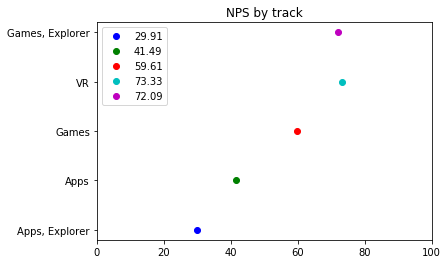

In [208]:
colors = ['b', 'g', 'r', 'c', 'm']

for i, track in enumerate(tracks):
    nps = calc_df_nps(df[df['Track'] == track])
    plt.plot(nps, track, 'ro', label=int(nps * 100)/100, color = colors[i])
    i += 1
plt.xlim(0, 100)
plt.legend(loc='upper left')
plt.title('NPS by track')

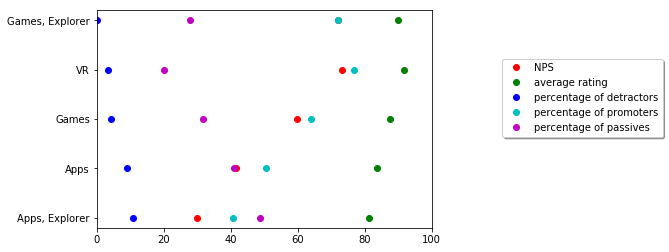

In [200]:
npses = []
avg_ratings = []
p_of_dets = []
p_of_pros = []
p_of_passes = []

for track in tracks:
    track_df = df[df['Track'] == track]
    npses.append(calc_df_nps(track_df))
    avg_ratings.append(track_df['Rating (Num)'].sum() / len(track_df) * 10)
    p_of_dets.append(count_detractors(track_df) / len(track_df) * 100)
    p_of_pros.append(count_promoters(track_df) / len(track_df) * 100)
    p_of_passes.append(count_passives(track_df) / len(track_df) * 100)

plt.plot(npses, tracks, 'ro', color = 'r', label='NPS')
plt.plot(avg_ratings, tracks, 'ro', color = 'g', label='average rating')
plt.plot(p_of_dets, tracks, 'ro', color = 'b', label='percentage of detractors')
plt.plot(p_of_pros, tracks, 'ro', color = 'c', label='percentage of promoters')
plt.plot(p_of_passes, tracks, 'ro', color = 'm', label='percentage of passives')

plt.xlim(0, 100)
plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)